In [300]:
from PIL import Image
import math
import numpy as np
import cv2 
from matplotlib import pyplot as plt 

im = Image.open("Downloads/img/dexter.png")  # Can be many different formats.
pix = im.load()
m= im.size[0]

#GETTING THE INITIAL VALUES
x = 0.1
y = 0.1


for i in range(100):     #We will discard the first 100 iterations because they're too similar. 
    #Henon Map formula
    xN = y + 1 - 1.4 * x**2
    yN = 0.3 * x

    # New x = xN and y = yN
    x = xN
    y = yN
        
pixA=[]
pixB=[]
savethexmat=[]
savetheymat=[]


#Important secret key thing:

paramlambda=math.floor(x*m*5000)
paramgamma=math.floor(y*m*5000)


for i in range(m*m):
        #Henon Map formula
    xN = y + 1 - 1.4 * x**2
    yN = 0.3 * x

        # New x = xN and y = yN
    x = xN
    y = yN
        
    savethexmat.append(xN)
    savetheymat.append(yN)
        
    pixA.append(abs(math.floor(xN*paramlambda))%256)
    pixB.append(abs(math.floor(yN*paramgamma))%256)
        
    #getting the secret image as matrices from the pixels    
secretimagea=np.reshape(pixA,(m,m))
secretimageb=np.reshape(pixB,(m,m))
    
Pvalues=[]
Qvalues=[]
    
#Getting values for P and Q
j=math.floor(m*m/2)
for i in range(j):
        
    Pvalues.append(abs(math.floor(savethexmat[i]*math.pow(10,14)))%26010)
    Qvalues.append(abs(math.floor(savetheymat[i]*math.pow(10,14)))%15080)
    
    
   

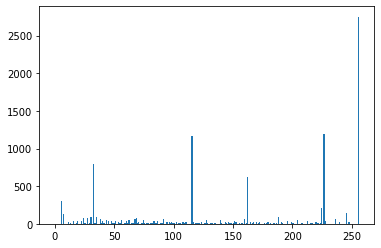

In [301]:
img = cv2.imread('Downloads/img/dexter.png',0) 
  
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()

In [302]:
#Arnold Cat iteration really quick:
image_matrix = []
for width in range(m):
    row = []
    for height in range(m):
        try:
            row.append((pix[width,height]))
        except:
            row=[pix[width, height]]
    try:
        image_matrix.append(row)
    except:
        image_matrix = [row]



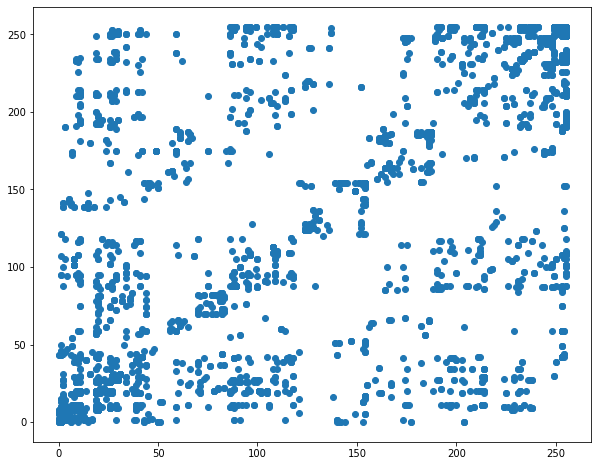

In [303]:
import random
samples_x=[]
samples_y=[]

for i in range (m*m):
    x=random.randint(0,m-2)
    y=random.randint(0,m-1)
    samples_x.append(image_matrix[x][y])
    samples_y.append(image_matrix[x+1][y])

plt.figure(figsize=(10,8))
plt.scatter(samples_x, samples_y)
plt.show()

In [304]:
image_matrix

[[255,
  255,
  255,
  255,
  255,
  255,
  238,
  235,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  117,
  192,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  237,
  210,
  190,
  197,
  234

In [305]:
#ARNOLD-CAT ITERATION R TIMES 
img2 = np.zeros([m,m])
r=math.floor(m/3)

for i in range(r):
    for x in range(0, m):
        for y in range(0, m):

            img2[x][y] = image_matrix[(x+Pvalues[i]*y)%m][(Qvalues[i]*x+(1+Pvalues[i]*Qvalues[i])*y)%m]

image_matrix=img2

In [306]:
cv2.imwrite("Downloads/img/aa1.jpg", image_matrix)

True

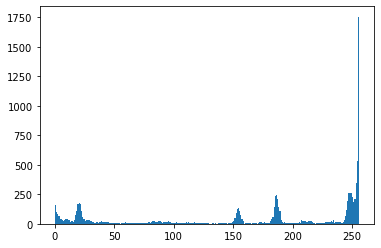

In [307]:
img = cv2.imread('Downloads/img/aa1.jpg',0) 
  
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()

In [308]:
#XORing the secret images generated:

def returningbinarytuples(p):
    binary=[]
    for i in range(8):
        binary.append(int(p%2))
        p=(p-(p%2))/2
        
    binaryreal=[0,0,0,0,0,0,0,0]

    for i in range(8):
        binaryreal[7-i]=binary[i]
    return binaryreal

def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + bit
    return decimal

imageaxor=[]
imagebxor=[]

for i in range(m):
    for j in range(m):
        
        imageaxor.append(returningbinarytuples(secretimagea[i][j]))
        
for i in range(m):
    for j in range(m):
        imagebxor.append(returningbinarytuples(secretimageb[i][j]))


            
        

In [309]:
#XORing secret images bitwise

secretxorfinal = []
for i in range(m*m):
    row = []
    for j in range(8):
        try:
            row.append(imageaxor[i][j] ^ imagebxor[i][j])
        except:
            row = row.append(imageaxor[i][j] ^ imagebxor[i][j])
    try:
        thedecimalpart=dec(row)
        secretxorfinal.append(thedecimalpart)
    except:
        secretxorfinal=row

secretxorfinal=np.reshape(secretxorfinal,(m,m))

secretxorfinal

array([[200,  24, 165, ...,  56,  59,  71],
       [162,  51,  45, ..., 248, 187,  62],
       [ 84,  46, 146, ...,  88,  43,  53],
       ...,
       [ 81, 120,  77, ..., 122, 127, 162],
       [253,  97, 126, ...,  37, 105, 110],
       [ 89, 127, 225, ...,  73,  71,  89]])

In [310]:
#ARNOLD CAT ON SECRET IMAGE:

img3 = np.zeros([m,m])
q=math.floor(5*m/7)

for i in range(q):
    for x in range(0, m):
        for y in range(0, m):

            img3[x][y] = secretxorfinal[(x+Pvalues[i]*y)%m][(Qvalues[i]*x+(1+Pvalues[i]*Qvalues[i])*y)%m]

secretxorfinal=img3

In [311]:
#Getting ready to encryp with a bitwise xor

side1=[]
side2=[]

for i in range(m):
    for j in range(m):
        
        side1.append(returningbinarytuples(secretxorfinal[i][j]))
        
for i in range(m):
    for j in range(m):
        side2.append(returningbinarytuples(image_matrix[i][j]))

In [312]:
encrypted=[]
for i in range(m*m):
    row = []
    for j in range(8):
        try:
            row.append(side1[i][j] ^ side2[i][j])
        except:
            row = row.append(side1[i][j] ^ side2[i][j])
    try:
        thedecimalpart=dec(row)
        encrypted.append(thedecimalpart)
    except:
        encrypted=row
        
encrypted=np.reshape(encrypted,(m,m))

In [313]:
cv2.imwrite("Downloads/img/aaryaencrypted.jpg", encrypted)

True

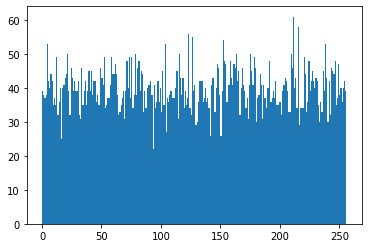

In [314]:
img = cv2.imread('Downloads/img/aaryaencrypted.jpg',0) 
  
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()

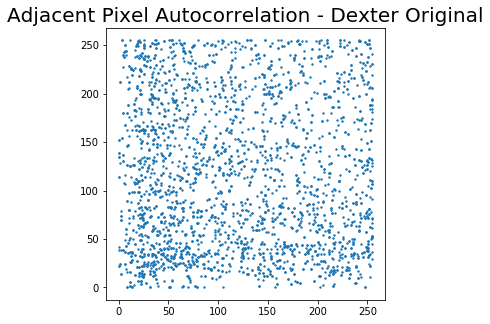

In [337]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log


samples_x = []
samples_y = []
for i in range(1024):
    x = random.randint(0,m-2)
    y = random.randint(0,m-1)
    samples_x.append(image_matrix[x][y])
    samples_y.append(image_matrix[x+1][y])
plt.figure(figsize=(5,5))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Dexter Original', fontsize=20)
plt.show()

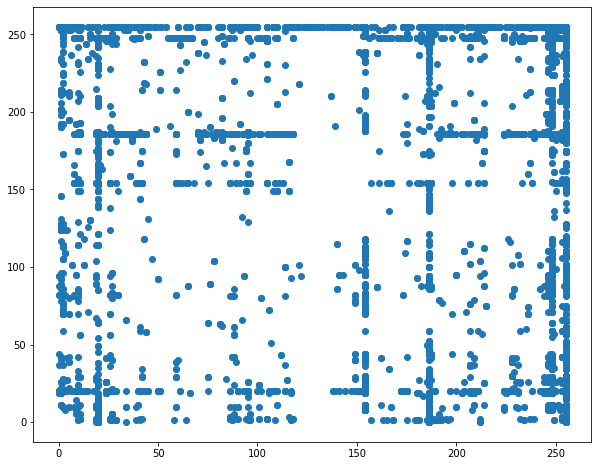

In [320]:
import random
samples_x=[]
samples_y=[]

for i in range (m*m):
    x=random.randint(0,m-2)
    y=random.randint(0,m-1)
    samples_x.append(image_matrix[x][y])
    samples_y.append(image_matrix[x+1][y])

plt.figure(figsize=(10,8))
plt.scatter(samples_x, samples_y)
plt.show()

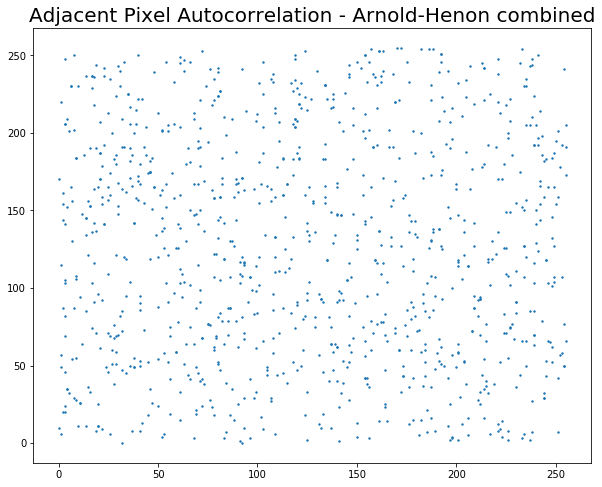

In [316]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log


samples_x = []
samples_y = []
for i in range(1024):
    x = random.randint(0,m-2)
    y = random.randint(0,m-1)
    samples_x.append(encrypted[x][y])
    samples_y.append(encrypted[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Arnold-Henon combined', fontsize=20)
plt.show()

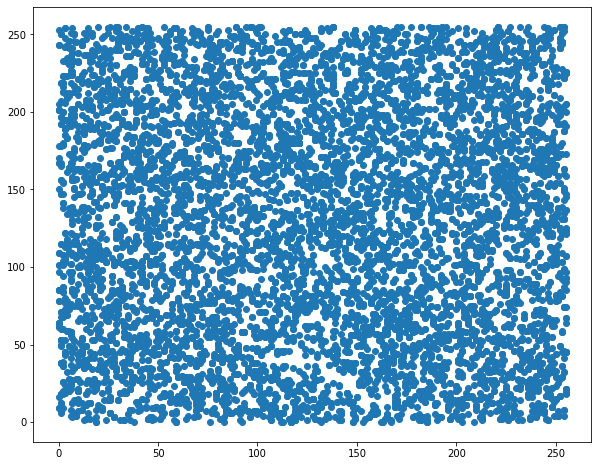

In [83]:
import random
samples_x=[]
samples_y=[]

for i in range (m*m):
    x=random.randint(0,m-2)
    y=random.randint(0,m-1)
    samples_x.append(encrypted[x][y])
    samples_y.append(encrypted[x+1][y])

plt.figure(figsize=(10,8))
plt.scatter(samples_x, samples_y)
plt.show()

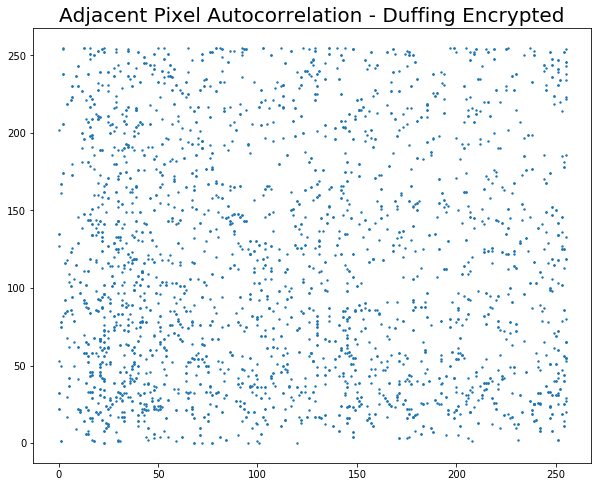

In [291]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log


samples_x = []
samples_y = []
for i in range(1024):
    x = random.randint(0,m-2)
    y = random.randint(0,m-1)
    samples_x.append(img2[x][y])
    samples_y.append(img2[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Duffing Encrypted', fontsize=20)
plt.show()

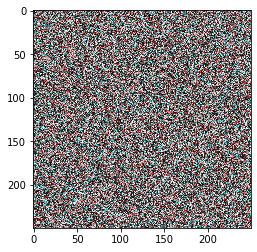

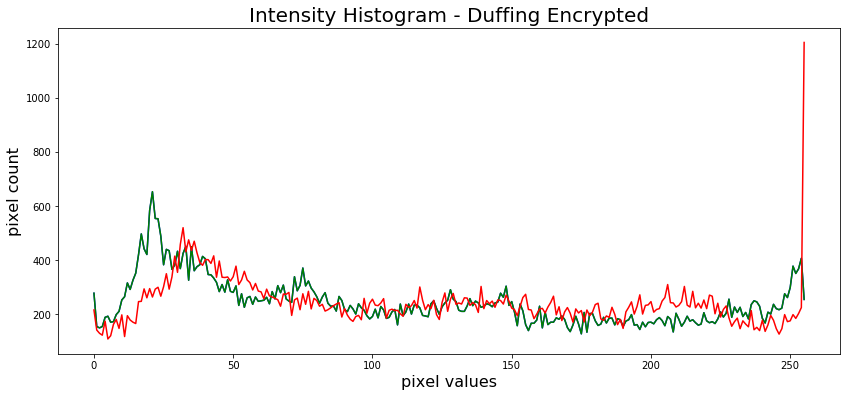

In [293]:
img = cv2.imread("Downloads/img/duffingencrypted1.bmp",1) 
pil_im = Image.open("Downloads/img/duffingencrypted1.bmp", 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Duffing Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

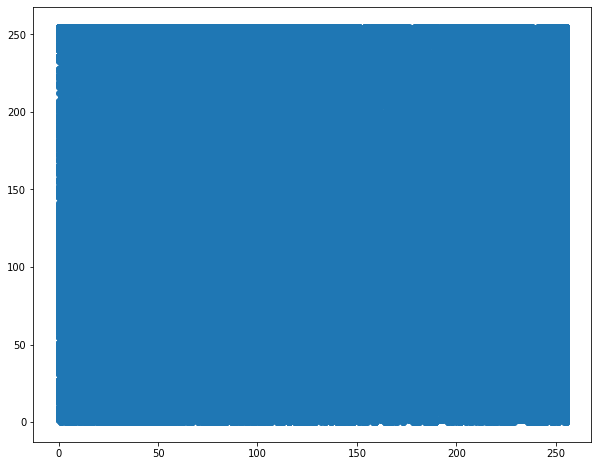

In [287]:
import random
samples_x=[]
samples_y=[]

for i in range (m*m):
    x=random.randint(0,m-2)
    y=random.randint(0,m-1)
    samples_x.append(img2[x][y])
    samples_y.append(img2[x+1][y])

plt.figure(figsize=(10,8))
plt.scatter(samples_x, samples_y)
plt.show()

In [321]:
#DUFFING DECRYPTION

im = Image.open("Downloads/img/duffingencrypted1.bmp")  # Can be many different formats.
pix = im.load()
m= im.size[0]

In [322]:
image_matrix = []
for width in range(m):
    row = []
    for height in range(m):
        try:
            row.append((pix[width,height]))
        except:
            row=[pix[width, height]]
    try:
        image_matrix.append(row)
    except:
        image_matrix = [row]

In [323]:
image_matrix

[[(89, 52, 52),
  (101, 114, 114),
  (215, 148, 148),
  (255, 228, 228),
  (34, 24, 24),
  (193, 244, 244),
  (167, 174, 174),
  (225, 235, 235),
  (68, 69, 69),
  (65, 28, 28),
  (52, 36, 36),
  (224, 237, 237),
  (77, 60, 60),
  (139, 76, 76),
  (124, 169, 169),
  (242, 250, 250),
  (179, 109, 109),
  (223, 146, 146),
  (99, 72, 72),
  (73, 50, 50),
  (240, 213, 213),
  (248, 40, 40),
  (167, 154, 154),
  (43, 36, 36),
  (88, 59, 59),
  (75, 45, 45),
  (2, 74, 74),
  (173, 223, 223),
  (222, 149, 149),
  (149, 167, 167),
  (37, 31, 31),
  (145, 97, 97),
  (255, 242, 242),
  (43, 33, 33),
  (175, 122, 122),
  (101, 68, 68),
  (205, 229, 229),
  (25, 24, 24),
  (164, 165, 165),
  (226, 252, 252),
  (69, 51, 51),
  (47, 16, 16),
  (149, 110, 110),
  (145, 155, 155),
  (97, 107, 107),
  (36, 85, 85),
  (196, 122, 122),
  (32, 21, 21),
  (67, 54, 54),
  (170, 221, 221),
  (101, 146, 146),
  (113, 47, 47),
  (2, 44, 44),
  (2, 7, 7),
  (157, 38, 38),
  (196, 223, 223),
  (255, 245, 245),
 

In [324]:
img2 = image_matrix

for j in range(20):
    for x in range(m):
        for y in range(m):

            img2[x][y] = image_matrix[(x+y)%m][(x+2*y)%m]

In [325]:
len(img2)

250

In [326]:
#RED PLANE

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][0])
        for k in range (8):
            imagebitwise.append(queen[k])
            
r=[]

for i in range (m*m*8):
    r.append(imagebitwise[i]^h1[i] ^ h2[i])
len(r)

500000

In [327]:
# GREEN PLANE X
imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])
            
g=[]

for i in range (m*m*8):
    g.append(imagebitwise[i]^h1[i] ^h2[i])
len(g)

500000

In [328]:
#BLUE PLANE X

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])
            
b=[]

for i in range (m*m*8):
    b.append(imagebitwise[i]^h1[i] ^h2[i])

len(b)

500000

In [329]:
r=np.reshape(r,(m*m,8))

In [330]:
g=np.reshape(g,(m*m,8))


In [331]:
b=np.reshape(b,(m*m,8))


In [333]:
#Decrypted image:

decrypted1=[]
decryprow=[]
for i in range(1,(m*m)+1):
    try:
        r1=dec(r[i-1])
        g1=dec(g[i-1])
        b1=dec(b[i-1])
        decryprow.append((r1,g1,b1))
        if(i%m==0):
            decrypted1.append(decryprow)
            decryprow=[]
        
    except:
        ;
        


In [334]:
im5 = Image.new("L", (m, m))
rgb_im = im5.convert('RGBA')
pix = rgb_im.load()

for x in range(m):
    for y in range(m):
        pix[x, y] = img2[x][y]
rgb_im.save("Downloads/img/duffingdecrypted1.bmp", "BMP")